In [1]:
# load builtin dataset
from tensorflow.keras.datasets import mnist

2023-02-26 07:27:10.372508: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [ ]:
# training on 60K 28x28 grayscale images labeled from 0-9

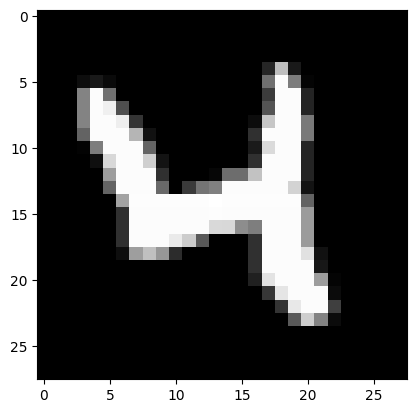

Label: 4


In [8]:
from matplotlib import pyplot as plt
img = 20
plt.imshow(x_train[img])
plt.gray()
plt.show()
print(f"Label: {y_train[img]}")

### Data Preprocessing

In [9]:
# data preprocessing
x_train = x_train / 255   # can do this instead of using standard scaler
x_test = x_test / 255

In [14]:
# multi-class problems --> softmax on output array of 60K x 10 (one col for each class)
# reshape the input to add channels -- only one channel because the image is grayscale -- basically wrap the input in an array
train_data = x_train.reshape(60000, 28, 28, 1)
test_data = x_test.reshape(10000, 28, 28, 1)

### One Hot Encoding for Output Variable 

In [11]:
# one hot encoding for output variable -- needed to work with softmax output
from tensorflow.keras.utils import to_categorical

In [13]:
train_target = to_categorical(y_train)
test_target = to_categorical(y_test)
print(train_target)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


### Build the Network

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Input, Dense, Dropout
from tensorflow.keras.models import Sequential
from livelossplot import PlotLossesKerasTF

In [20]:
model = Sequential()
model.add(Input(shape=(28,28,1)))

# filters --> # of filter matrices to use --> these draw lines/circles out of the image
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))# Softmax output for multi-class classification

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
________________________________________________

In [22]:
model.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

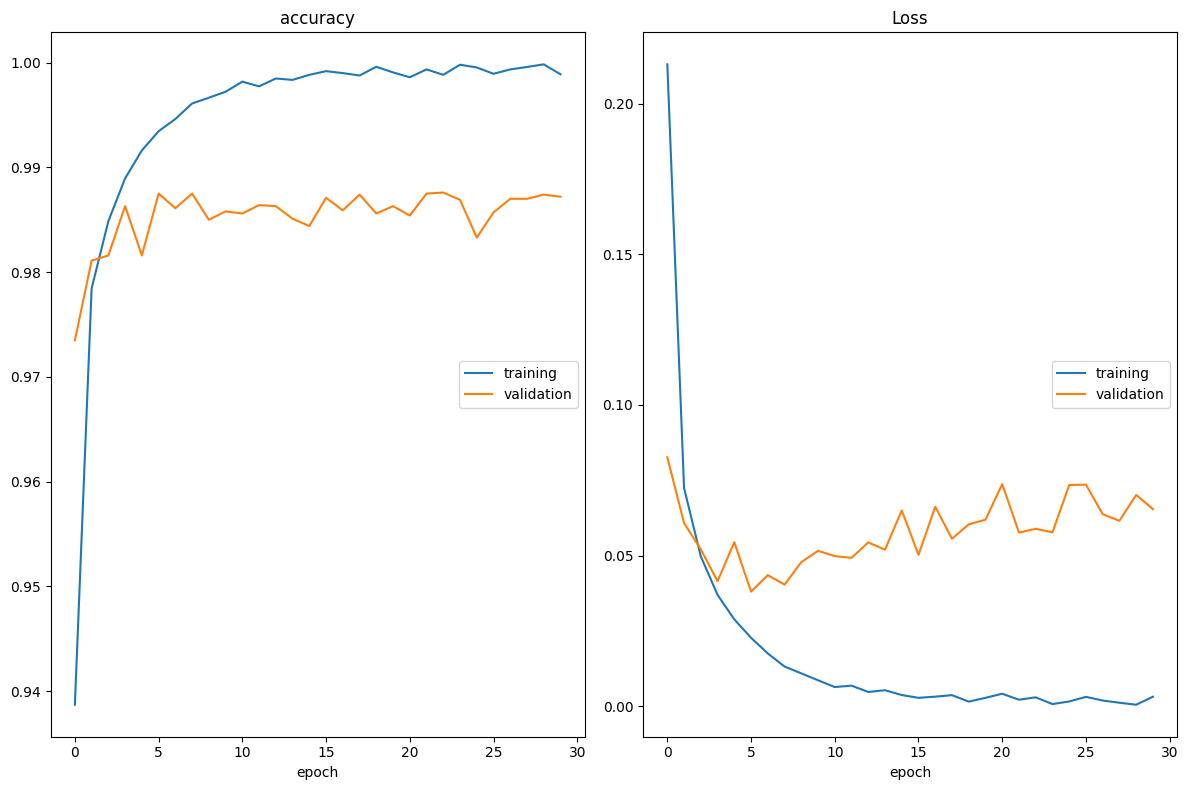

accuracy
	training         	 (min:    0.939, max:    1.000, cur:    0.999)
	validation       	 (min:    0.974, max:    0.988, cur:    0.987)
Loss
	training         	 (min:    0.001, max:    0.213, cur:    0.003)
	validation       	 (min:    0.038, max:    0.083, cur:    0.065)
938/938 [==============================] - 9s 10ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0654 - val_accuracy: 0.9872


In [23]:
# train the model
model.fit(
    train_data, 
    train_target, 
    epochs=30, 
    batch_size=64, 
    validation_data=(test_data, test_target),
    callbacks=[PlotLossesKerasTF()]
)

In [24]:
# add early stopping
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
es = EarlyStopping(monitor='val_loss', patience=4)

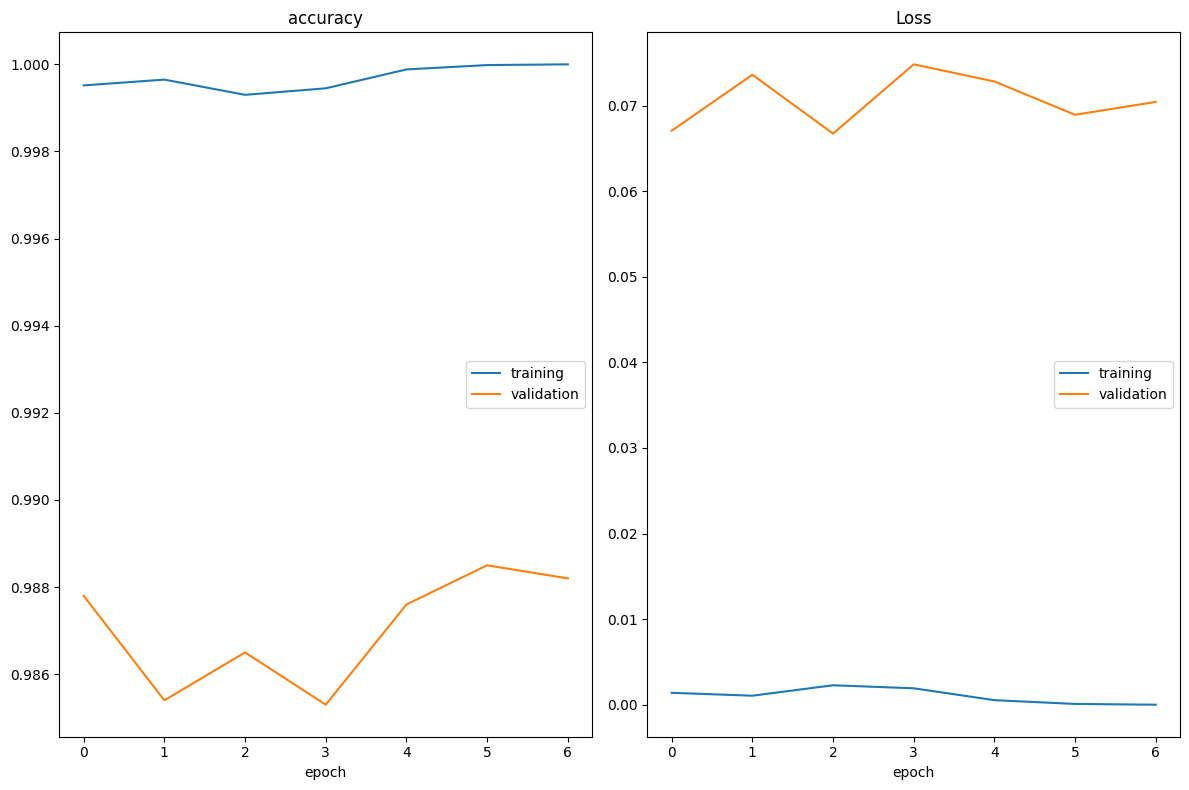

accuracy
	training         	 (min:    0.999, max:    1.000, cur:    1.000)
	validation       	 (min:    0.985, max:    0.988, cur:    0.988)
Loss
	training         	 (min:    0.000, max:    0.002, cur:    0.000)
	validation       	 (min:    0.067, max:    0.075, cur:    0.070)
938/938 [==============================] - 9s 9ms/step - loss: 1.4933e-05 - accuracy: 1.0000 - val_loss: 0.0704 - val_accuracy: 0.9882


In [27]:
model.fit(
    train_data, 
    train_target, 
    epochs=30, 
    batch_size=64, 
    validation_data=(test_data, test_target),
    callbacks=[PlotLossesKerasTF(), es]
)